In [16]:
import cv2  # pip install
import numpy as np  # pip install
import glob
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install
from tqdm import tqdm

In [17]:
images = {}
index = {}
for path in glob.glob("C:/Users/aka-studio/Desktop/Assignments/ML/data/*.jpg"):
#     print(path)
    image = cv2.imread(path)
    filename = path.split("\\")[-1]
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist).flatten()
    index[filename] = hist
    print(filename)

hulk.jpg
ironman.jpg
magnetto.jpg
spiderman.jpg
venom.jpg
wolverine.jpg
wonderwoman.jpg
wonderwoman2.jpg


In [18]:
import numpy as np
class KMeans():
    def __init__(self, k):
        self.k = k # Amount of classes
    
    def fit(self, data):
        self.data = data
        #Put your code here for 
        # 1.centroid init
        # 2.iterations through data points and evaluation of centroids' positions
        self.centroids = np.random.randint(0, 256, size=(self.k, 3))
        losses = []
        best_loss = 1e+10
        while True:
            r_n_k = np.zeros((self.data.shape[0], self.k))
            centroid_sum = [np.linalg.norm(self.data-self.centroids[i], axis=1) for i in range(self.k)]
            min_centroid_sum = np.argmin(centroid_sum, axis=0)
            for i in range(self.k):
                r_n_k[min_centroid_sum==i, i] = 1
                
            loss = np.sum([np.sum(r_n_k[:,i]*np.linalg.norm(self.data-self.centroids[i], axis=1), axis=0) for i in range(self.k)], axis=0)
            if loss >= best_loss:
                break

            for i in range(self.centroids.shape[0]):
                self.centroids[i] = np.sum(r_n_k[:, i][:, np.newaxis]*self.data, axis=0)/np.sum(r_n_k[:, i])
            losses.append(loss)
            best_loss = loss
            
        return losses 
            
    
    def classify(self,x):
#        return np.random.randint(0, high = 255,size=3)
        min_centroid = np.argmin([np.linalg.norm(self.data-self.centroids[i], axis=1) for i in range(self.k)], axis=0)
        x_new = np.zeros(x.shape)
        for i in range(self.centroids.shape[0]):
            x_new[min_centroid==i, :] = self.centroids[i]
        return x_new.astype(np.uint8)

In [19]:
data = [images[k].reshape((-1,3)) for k in images.keys()]
data[0].shape

(22500, 3)

In [20]:
kmeans = KMeans(2)
losses = kmeans.fit(data[0])

#Make the classify for every point in the original image and substitute the color with the result of classify()
new_data = kmeans.classify(data[0])

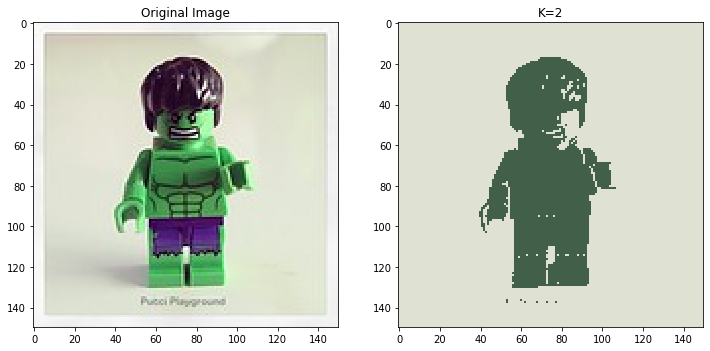

In [21]:
# Visualize the result image 
# Put your code here
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(data[0].reshape(150, 150, 3))

plt.subplot(1, 2, 2)
plt.title('K=2')
plt.imshow(new_data.reshape(150, 150, 3))

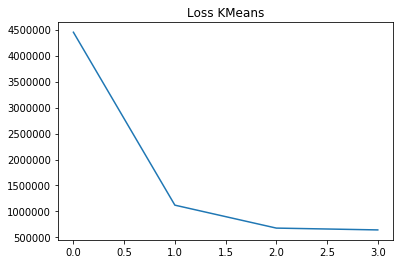

In [22]:
plt.title('Loss KMeans')
plt.plot(np.arange(0, len(losses)), losses)

In [23]:
new_datas = []
sum_squares = []
for k in [2, 3, 5, 10]:
    kmeans = KMeans(k)
    sum_squares.append(kmeans.fit(data[0])[-1])
    new_datas.append(kmeans.classify(data[0]))

C:\Users\aka-studio\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


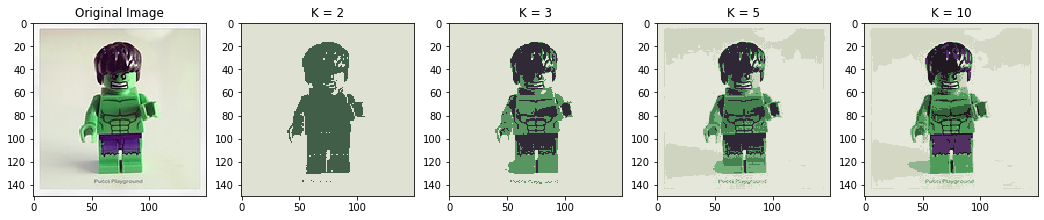

In [24]:
plt.figure(figsize=(18, 12))
plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(data[0].reshape(150, 150, 3))
for i, k in enumerate([2, 3, 5, 10]):
    plt.subplot(1, 5, i+2)
    plt.title(f'K = {k}')
    plt.imshow(new_datas[i].reshape(150, 150, 3))
    
plt.show()

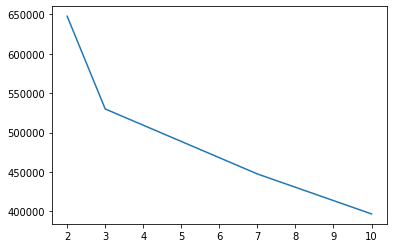

In [25]:
plt.plot([2, 3, 7, 10], sum_squares)